In [1]:
import numpy as np
import pandas as pd

In [2]:
##Install joblib module for parallelization
import sys
!conda install --yes --prefix {sys.prefix} joblib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.6.8

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
import math

In [4]:
import statsmodels.api as sm

In [5]:
import time

In [6]:
import dmpFinder_pandasdataframe as dmp

In [7]:
##Read in test values generated from minfi processing of liver sample dataset
test_betas = pd.read_csv("Sample_Beta_value_matrix_quantilePreprocessed.csv",index_col=0)

In [8]:
##Write custom function to convert Beta methylation values to M values
def M_from_Beta(beta):
    M = math.log(beta/(1-beta),2)
    return M

In [9]:
test_M_values = test_betas.applymap(M_from_Beta)

In [10]:
test_M_values

,GSM1711360_9247377093_R02C01,GSM1711361_9247377093_R03C01,GSM1711362_9247377093_R06C02,GSM1711363_9247377085_R04C02,GSM1711364_9247377093_R05C01,GSM1711365_9247377093_R02C02
cg13869341,2.547870,2.612481,2.407647,2.676180,2.692148,3.013325
cg14008030,2.043202,2.078623,1.848842,1.965331,2.011791,2.597961
cg12045430,-2.222988,-2.389980,-2.548526,-2.333170,-1.994200,-2.041155
cg20826792,-0.135026,-0.326952,-0.938051,0.122318,0.372793,0.235990
cg00381604,-1.722364,-1.934662,-2.316447,-2.287216,-2.079610,-2.367813
cg20253340,0.537559,0.722294,1.020341,0.501420,1.412389,1.392470
cg21870274,1.347587,1.406562,1.735507,1.972384,1.763546,1.932937
cg03130891,-0.433972,-1.268719,-0.627667,-0.258275,-2.683717,-1.597639
cg24335620,2.360483,2.047020,2.242760,2.719948,2.918665,2.164679
cg16162899,2.392776,2.342143,2.178413,0.699556,2.989274,3.152466


In [11]:
test_M_values.iloc[0].name

'cg13869341'

## Testing logistic regression

In [12]:
##Create a logistic regression dataset using strings that will later be converted to zeros and ones
test_pheno_data = ["fetal","fetal","fetal","adult","adult","adult"]

In [13]:
test_M_values_T = test_M_values.transpose()
test_M_values_T

,cg13869341,cg14008030,cg12045430,cg20826792,cg00381604,cg20253340,cg21870274,cg03130891,cg24335620,cg16162899,...,cg26983430,cg22051787,cg01757887,cg00061679,cg03930849,cg17939569,cg13365400,cg21106100,cg08265308,cg14273923
GSM1711360_9247377093_R02C01,2.547870,2.043202,-2.222988,-0.135026,-1.722364,0.537559,1.347587,-0.433972,2.360483,2.392776,...,3.220548,2.082322,2.820271,0.463840,-0.044587,1.409044,2.831793,2.389030,3.591703,2.206086
GSM1711361_9247377093_R03C01,2.612481,2.078623,-2.389980,-0.326952,-1.934662,0.722294,1.406562,-1.268719,2.047020,2.342143,...,3.196339,2.207951,2.792907,0.386100,-0.195363,1.395253,3.040805,2.124099,3.451508,1.587681
GSM1711362_9247377093_R06C02,2.407647,1.848842,-2.548526,-0.938051,-2.316447,1.020341,1.735507,-0.627667,2.242760,2.178413,...,3.332391,2.158995,3.151091,0.598298,-0.165351,1.506399,2.916943,2.640826,3.504036,1.969911
GSM1711363_9247377085_R04C02,2.676180,1.965331,-2.333170,0.122318,-2.287216,0.501420,1.972384,-0.258275,2.719948,0.699556,...,3.753646,2.267392,1.641307,1.090606,1.122186,1.917001,0.669558,2.521948,3.533657,1.460324
GSM1711364_9247377093_R05C01,2.692148,2.011791,-1.994200,0.372793,-2.079610,1.412389,1.763546,-2.683717,2.918665,2.989274,...,3.628976,2.305335,1.027693,1.123571,0.967820,1.779473,0.494324,2.931014,3.670727,1.640711
GSM1711365_9247377093_R02C02,3.013325,2.597961,-2.041155,0.235990,-2.367813,1.392470,1.932937,-1.597639,2.164679,3.152466,...,3.948696,2.169139,1.677626,1.148109,1.256250,1.534310,0.878590,3.153679,3.559484,1.996466


In [14]:
test_M_values_T.iloc[:,:10]

,cg13869341,cg14008030,cg12045430,cg20826792,cg00381604,cg20253340,cg21870274,cg03130891,cg24335620,cg16162899
GSM1711360_9247377093_R02C01,2.547870,2.043202,-2.222988,-0.135026,-1.722364,0.537559,1.347587,-0.433972,2.360483,2.392776
GSM1711361_9247377093_R03C01,2.612481,2.078623,-2.389980,-0.326952,-1.934662,0.722294,1.406562,-1.268719,2.047020,2.342143
GSM1711362_9247377093_R06C02,2.407647,1.848842,-2.548526,-0.938051,-2.316447,1.020341,1.735507,-0.627667,2.242760,2.178413
GSM1711363_9247377085_R04C02,2.676180,1.965331,-2.333170,0.122318,-2.287216,0.501420,1.972384,-0.258275,2.719948,0.699556
GSM1711364_9247377093_R05C01,2.692148,2.011791,-1.994200,0.372793,-2.079610,1.412389,1.763546,-2.683717,2.918665,2.989274
GSM1711365_9247377093_R02C02,3.013325,2.597961,-2.041155,0.235990,-2.367813,1.392470,1.932937,-1.597639,2.164679,3.152466


In [15]:
##Run a logistic regression on the methylation data
test_results = dmp.detect_DMPs(test_M_values_T.iloc[:,:1000],test_pheno_data,regression_method="logistic")

Because phenotypes were provided as values other than 0 and 1, all samples with the phenotype fetal were assigned a value of 0 and all samples with the phenotype adult were assigned a value of 1 for the logistic regression analysis.
32 probes failed the logistic regression analysis due to perfect separation and could not be included in the final results.
Probes with perfect separation errors:
cg20826792
cg20825023
cg06623778
cg09856436
cg14156792
cg01727431
cg18439833
cg15713103
cg06712559
cg16318112
cg09248054
cg15840462
cg27541454
cg23625715
cg26222311
cg21139076
cg18432292
cg19925558
cg06615380
cg02854937
cg14288281
cg05336956
cg15414773
cg14476334
cg14786652
cg00699898
cg18312010
cg20411340
cg04719903
cg17177602
cg08884932
cg05397202


In [16]:
test_results

,95%CI_lower,95%CI_upper,Coefficient,PValue,StandardError,FDR_QValue
cg13869341,-0.563125,0.639586,0.038231,0.900838,0.306820,0.999696
cg23651812,-0.394477,0.440738,0.023131,0.913551,0.213069,0.999696
cg03528302,-0.522391,0.978382,0.227996,0.551502,0.382857,0.999696
cg12760887,-0.832464,0.813214,-0.009625,0.981709,0.419823,0.999696
cg18348086,-0.824256,0.902096,0.038920,0.929580,0.440404,0.999696
cg23731501,-0.546602,0.544452,-0.001075,0.996918,0.278335,0.999696
cg14287724,-0.691912,0.554240,-0.068836,0.828573,0.317902,0.999696
cg25605174,-0.766004,1.075788,0.154892,0.741657,0.469853,0.999696
cg22874652,-1.103155,0.905724,-0.098716,0.847254,0.512478,0.999696
cg26578072,-1.026153,1.170304,0.072076,0.897650,0.560331,0.999696


## Testing linear regression

In [17]:
##Create a linear regression dataset using strings that will be coerced to numbers (adult ages are estimates, not exact)
test_pheno_data = ["0","0","0","52","54","57"]

In [18]:
start = time.time()

In [19]:
##Run a linear regression on the methylation data
test_results = dmp.detect_DMPs(test_M_values_T.iloc[:,:1000],test_pheno_data,regression_method="linear")

In [20]:
## Check how long it took for the regression to run on the dataset
print(time.time() - start)

1.7400128841400146


In [21]:
test_results

,95%CI_lower,95%CI_upper,Coefficient,PValue,StandardError,FDR_QValue
cg13219080,0.035537,0.042858,0.039198,1.184169e-06,0.001424,0.000395
cg00825734,0.029598,0.035287,0.032443,8.657598e-07,0.001107,0.000395
cg17970390,0.044543,0.053476,0.049009,1.049131e-06,0.001738,0.000395
cg06520508,0.051859,0.064084,0.057971,2.164827e-06,0.002378,0.000541
cg22512779,0.025992,0.033782,0.029887,6.183059e-06,0.001515,0.001237
cg14476334,0.009402,0.012813,0.011108,1.389597e-05,0.000663,0.002316
cg11229611,0.020941,0.029046,0.024993,1.816499e-05,0.001576,0.002595
cg04098194,-0.061288,-0.043063,-0.052175,2.616738e-05,0.003545,0.002768
cg13587552,0.034594,0.049440,0.042017,2.768201e-05,0.002888,0.002768
cg21779088,0.040349,0.057560,0.048955,2.700889e-05,0.003348,0.002768


In [22]:
test_M_values_T.iloc[:,:1000]

,cg13869341,cg14008030,cg12045430,cg20826792,cg00381604,cg20253340,cg21870274,cg03130891,cg24335620,cg16162899,...,cg16255279,cg22622472,cg16432326,cg07394827,cg02625725,cg21647460,cg16590012,cg20705390,cg04981007,cg16430279
GSM1711360_9247377093_R02C01,2.547870,2.043202,-2.222988,-0.135026,-1.722364,0.537559,1.347587,-0.433972,2.360483,2.392776,...,3.760821,3.428959,2.873547,3.115448,1.932027,3.212841,3.374941,1.952121,2.510269,2.629074
GSM1711361_9247377093_R03C01,2.612481,2.078623,-2.389980,-0.326952,-1.934662,0.722294,1.406562,-1.268719,2.047020,2.342143,...,3.690443,3.552150,2.308156,2.886115,1.753704,3.279613,3.420423,2.115456,2.507577,2.480776
GSM1711362_9247377093_R06C02,2.407647,1.848842,-2.548526,-0.938051,-2.316447,1.020341,1.735507,-0.627667,2.242760,2.178413,...,3.702152,3.634872,2.920879,2.992730,1.974965,3.201247,3.423092,1.998219,2.549461,2.600622
GSM1711363_9247377085_R04C02,2.676180,1.965331,-2.333170,0.122318,-2.287216,0.501420,1.972384,-0.258275,2.719948,0.699556,...,3.690961,3.509728,2.863432,2.748748,1.901863,3.446499,3.355332,2.174970,2.766237,2.639723
GSM1711364_9247377093_R05C01,2.692148,2.011791,-1.994200,0.372793,-2.079610,1.412389,1.763546,-2.683717,2.918665,2.989274,...,3.699875,3.845077,3.024619,3.088503,1.924362,3.538176,3.454047,2.138982,2.786780,2.709802
GSM1711365_9247377093_R02C02,3.013325,2.597961,-2.041155,0.235990,-2.367813,1.392470,1.932937,-1.597639,2.164679,3.152466,...,3.685134,3.402656,2.575351,3.151930,1.865780,3.497641,3.324694,2.138917,2.803091,2.602011


## Testing Volcano plot visualizations

In [23]:
import matplotlib.pyplot as plt

In [24]:
test_results.FDR_QValue[0]

0.000394722940670385

In [25]:
cutoff = 0.05   ##choose the significance cutoff for coloring different points

In [26]:
colors = []
for i in range(len(test_results.FDR_QValue)):
    if test_results.FDR_QValue[i] < cutoff:
        if test_results.Coefficient[i] > 0:
            colors.append("red")
        else:
            colors.append("blue")
    else:
        colors.append("silver")

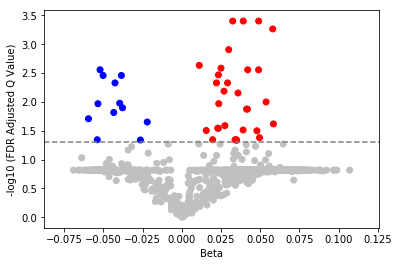

In [27]:
plt.scatter(test_results.Coefficient,-np.log10(test_results.FDR_QValue),c=colors)
plt.ylabel("-log10 (FDR Adjusted Q Value)")
plt.xlabel("Beta")
plt.axhline(y=-np.log10(cutoff), color="gray", linestyle='--')

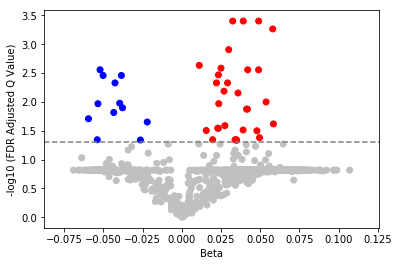

In [28]:
dmp.volcano_plot(test_results)

## Testing Manhattan plot visualizations

In [ ]:
##Copy of manifest-reading code from methpype
def readManifest(array):
    """Return Illumina manifest for array type
    Parameters
    ----------
    array: str
        String specifying the type of Illumina Methylation Array
    Returns
    -------
    manifest: dataframe
        Dataframe containing Illumina Human Methylation Array manifest
    """
    downloadManifest(array)
    if array == 'CustomArray':
        manifest = pd.read_csv(os.path.expanduser(
            "~/.methpype_manifest_files/CombinedManifestEPIC.manifest.CoreColumns.csv.gz"))
        # TEMPORARY - Remove missing probes
        manifest = manifest[manifest['AddressA_ID'] != 9614306]
        manifest = manifest[manifest['AddressA_ID'] != 9637526]
        manifest = manifest[manifest['AddressA_ID'] != 3680876]
        manifest = manifest[manifest['AddressB_ID'] != 60646183]
    elif array == 'IlluminaHumanMethylation450k':
        #manifest = pd.read_csv(os.path.expanduser("~/.methpype_manifest_files/HumanMethylation450_15017482_v1-2.CoreColumns.csv.gz"))
        manifest = pd.read_csv("~/HumanMethylation450_15017482_v1-2.csv")
    elif array == 'IlluminaHumanMethylationEPIC':
        manifest = pd.read_csv(os.path.expanduser(
            "~/.methpype_manifest_files/MethylationEPIC_v-1-0_B4.CoreColumns.csv.gz"))
    manifest = manifest.rename({'AddressA_ID': 'AddressA', 'AddressB_ID': 'AddressB', 'Infinium_Design_Type': 'Type',
                                'Color_Channel': 'Color', 'IlmnID': 'CtrlAddress', 'Name': 'Name'}, axis='columns')
    manifest.dropna(how='all', inplace=True)
    manifest = flagProbeTypes(manifest)
    # CURRENTLY UNUSED CODE
    # KEEP FOR FUTURE ITERATION WHERE PROBE SEQUENCES CAN BE MAPPED BACK
    # # determine nCpGs
    # nCpGs = {}
    # for name,A,B,T in zip(manifest['Name'],manifest['ProbeSeqA'],manifest['ProbeSeqB'],manifest['Type']):
    #   if T == 'I':
    #       nCpGs[name] = int(B.count("CG")-1)
    #   elif T == 'II':
    #       nCpGs[name] = int(A.count('R'))
    #   else:
    #       nCpGs[name] = int(0)
    # # add to dataframe
    # manifest['nCpG'] = manifest['Name'].map(nCpGs)
    # determine types
    return manifest


In [ ]:
##Copy of genome mapping function from methpype
def mapToGenome(df, rgset):
    """Maps dataframe to genome locations
    Parameters
    ----------
    df: dataframe
            Dataframe containing methylation, unmethylation, M or Beta
            values for each sample at each site
    rgset: rg channel set instance
            RG channel set instance related to provided df
    Returns
    -------
    df: dataframe
            Dataframe containing the original values with the addition
            of genomic locations for each site
    """
    if 'Name' in df.columns:
        mani = rgset.manifest
        chromosomes = dict(
            zip(list(mani['Name'].values), list(mani['CHR'].values)))
        strands = dict(
            zip(list(mani['Name'].values), list(mani['Strand'].values)))
        build = dict(zip(list(mani['Name'].values),
                         list(mani['Genome_Build'].values)))
        mapinfo = dict(
            zip(list(mani['Name'].values), list(mani['MAPINFO'].values)))
        df['Chr'] = df['Name'].map(chromosomes)
        df['Strand'] = df['Name'].map(strands)
        df['GenomeBuild'] = df['Name'].map(build)
        df['MapInfo'] = df['Name'].map(mapinfo)
        return df
    else:
        print("No 'Name' column in dataframe.")
        return

# Scratch space for testing individual commands on toy data

In [14]:
test_M_data = [0.2,0.3,0.25,0.7,0.85,0.6]
test_pheno_data = [0,0,0,1,1,1]

In [15]:
logit = sm.Logit(test_pheno_data,test_M_data)

In [16]:
results  = logit.fit()

Optimization terminated successfully.
         Current function value: 0.594959
         Iterations 5


In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                    6
Model:                          Logit   Df Residuals:                        5
Method:                           MLE   Df Model:                            0
Date:                Sat, 09 Feb 2019   Pseudo R-squ.:                  0.1417
Time:                        13:42:34   Log-Likelihood:                -3.5698
converged:                       True   LL-Null:                       -4.1589
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7936      1.813      0.990      0.322      -1.759       5.346
==============================================================================
"""

In [19]:
ci = results.conf_int(0.05)
ci[0][1]

5.346137094060719

In [23]:
test_betas.sort_values("GSM1711360_9247377093_R02C01",axis=0)

,Unnamed: 0,GSM1711360_9247377093_R02C01,GSM1711361_9247377093_R03C01,GSM1711362_9247377093_R06C02,GSM1711363_9247377085_R04C02,GSM1711364_9247377093_R05C01,GSM1711365_9247377093_R02C02
87594,cg19591588,0.017743,0.018065,0.101496,0.224640,0.273537,0.182838
90307,cg15434853,0.021852,0.139114,0.189430,0.212160,0.022258,0.271090
148148,cg09281601,0.024419,0.080527,0.078483,0.080021,0.092971,0.090493
425611,cg15443904,0.024506,0.129899,0.084596,0.105117,0.100131,0.086644
362536,cg02405503,0.025107,0.023994,0.024403,0.439127,0.023450,0.023473
98983,cg00879003,0.025474,0.022725,0.129780,0.168104,0.022833,0.025519
172392,cg06768644,0.026078,0.076340,0.178264,0.141804,0.024359,0.105617
54954,cg14126210,0.026200,0.069833,0.069105,0.096407,0.084530,0.029091
66287,cg23012288,0.027184,0.070775,0.059546,0.089020,0.086552,0.090865
311477,cg16455791,0.027227,0.158047,0.255635,0.145820,0.218865,0.200691


In [24]:
test_contpheno_data = [1.2,1.8,5.2,3.5,4.2,7.9]

In [26]:
contfit = sm.OLS(test_M_data,test_contpheno_data)

In [27]:
contresults = contfit.fit()

In [28]:
contresults.summary()

c:\users\alanna\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     15.26
Date:                Sat, 09 Feb 2019   Prob (F-statistic):             0.0113
Time:                        14:09:16   Log-Likelihood:               -0.64563
No. Observations:                   6   AIC:                             3.291
Df Residuals:                       5   BIC:                             3.083
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1035      0.027      3.906      0.011       0.035       0.172
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.208
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.523
Skew:                          -0.121   Prob(JB):                        0.770
Kurtosis:                       1.574   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
contresults.params

array([0.10353169])

In [30]:
contresults.bse

array([0.02650572])

In [31]:
contresults.pvalues

array([0.0113404])

In [33]:
CI = contresults.conf_int(0.05)

In [37]:
CI[0][0]

0.0353965749802231

In [42]:
test_betas.loc[test_betas["GSM1711360_9247377093_R02C01"]<0.05]

,Unnamed: 0,GSM1711360_9247377093_R02C01,GSM1711361_9247377093_R03C01,GSM1711362_9247377093_R06C02,GSM1711363_9247377085_R04C02,GSM1711364_9247377093_R05C01,GSM1711365_9247377093_R02C02
23870,cg13063202,0.038143,0.039297,0.123895,0.291207,0.387898,0.167021
24836,cg08721347,0.049294,0.062761,0.074099,0.065457,0.079355,0.053366
25824,cg26662579,0.044629,0.050689,0.055278,0.042834,0.070181,0.044900
26766,cg08355353,0.047230,0.077862,0.093055,0.096878,0.082565,0.103909
29757,cg06353611,0.036358,0.076823,0.098803,0.101642,0.105368,0.075714
41295,cg19646445,0.035841,0.098024,0.128458,0.084591,0.105271,0.111967
45133,cg13088206,0.045402,0.062783,0.067626,0.068240,0.064392,0.065421
51955,cg04001935,0.037971,0.088658,0.122948,0.095626,0.151766,0.105401
51981,cg12510286,0.032046,0.034377,0.142056,0.162866,0.035283,0.037058
54347,cg26534856,0.043709,0.066211,0.064099,0.062484,0.053549,0.063925


In [18]:
set(test_M_values.dtypes)

{dtype('float64')}

In [17]:
np.issubdtype(test_M_values,np.number)

TypeError: data type not understood

In [37]:
row_index = ["probe"]
stat_cols = ["Coefficient","95%CI_lower","95%CI_upper","StandardError","PValue","FDR_QValue"]
probe_stats = pd.DataFrame(index=row_index,columns=stat_cols)
probe_stats = probe_stats.fillna(np.nan)
probe_stats

,Coefficient,95%CI_lower,95%CI_upper,StandardError,PValue,FDR_QValue
probe,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
##Copied from earlier logistic toy example
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                    6
Model:                          Logit   Df Residuals:                        5
Method:                           MLE   Df Model:                            0
Date:                Sat, 09 Feb 2019   Pseudo R-squ.:                  0.1417
Time:                        16:05:56   Log-Likelihood:                -3.5698
converged:                       True   LL-Null:                       -4.1589
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7936      1.813      0.990      0.322      -1.759       5.346
==============================================================================
"""

In [38]:
probe_coef = results.params
probe_CI = results.conf_int(0.05)   ##returns the lower and upper bounds for the coefficient's 95% confidence interval
probe_SE = results.bse
probe_pval = results.pvalues

In [39]:
probe_stats.loc[row_index[0]] = {"Coefficient":probe_coef[0],"95%CI_lower":probe_CI[0][0],"95%CI_upper":probe_CI[0][1],"StandardError":probe_SE[0],"PValue":probe_pval[0]}
probe_stats

,Coefficient,95%CI_lower,95%CI_upper,StandardError,PValue,FDR_QValue
probe,1.793646,-1.758844,5.346137,1.812529,0.322378,NaN


In [30]:
probe_stats

,Coefficient,95%CI_lower,95%CI_upper,StandardError,PValue,FDR_QValue
probe,1.79365,NaN,NaN,NaN,NaN,NaN


In [17]:
import multiprocessing as mp

In [19]:
mp.cpu_count()

2

In [16]:
test_series = pd.Series({"A":1,"B":2,"C":3},name="firstRow")

In [17]:
test_series

A    1
B    2
C    3
Name: firstRow, dtype: int64

In [18]:
from joblib import cpu_count

In [19]:
cpu_count()

2

In [17]:
small_test = test_M_values_T.iloc[:,:10]
small_test

,cg13869341,cg14008030,cg12045430,cg20826792,cg00381604,cg20253340,cg21870274,cg03130891,cg24335620,cg16162899
GSM1711360_9247377093_R02C01,2.547870,2.043202,-2.222988,-0.135026,-1.722364,0.537559,1.347587,-0.433972,2.360483,2.392776
GSM1711361_9247377093_R03C01,2.612481,2.078623,-2.389980,-0.326952,-1.934662,0.722294,1.406562,-1.268719,2.047020,2.342143
GSM1711362_9247377093_R06C02,2.407647,1.848842,-2.548526,-0.938051,-2.316447,1.020341,1.735507,-0.627667,2.242760,2.178413
GSM1711363_9247377085_R04C02,2.676180,1.965331,-2.333170,0.122318,-2.287216,0.501420,1.972384,-0.258275,2.719948,0.699556
GSM1711364_9247377093_R05C01,2.692148,2.011791,-1.994200,0.372793,-2.079610,1.412389,1.763546,-2.683717,2.918665,2.989274
GSM1711365_9247377093_R02C02,3.013325,2.597961,-2.041155,0.235990,-2.367813,1.392470,1.932937,-1.597639,2.164679,3.152466


In [27]:
for i in small_test:
    print(small_test[i])

GSM1711360_9247377093_R02C01    2.547870
GSM1711361_9247377093_R03C01    2.612481
GSM1711362_9247377093_R06C02    2.407647
GSM1711363_9247377085_R04C02    2.676180
GSM1711364_9247377093_R05C01    2.692148
GSM1711365_9247377093_R02C02    3.013325
Name: cg13869341, dtype: float64
GSM1711360_9247377093_R02C01    2.043202
GSM1711361_9247377093_R03C01    2.078623
GSM1711362_9247377093_R06C02    1.848842
GSM1711363_9247377085_R04C02    1.965331
GSM1711364_9247377093_R05C01    2.011791
GSM1711365_9247377093_R02C02    2.597961
Name: cg14008030, dtype: float64
GSM1711360_9247377093_R02C01   -2.222988
GSM1711361_9247377093_R03C01   -2.389980
GSM1711362_9247377093_R06C02   -2.548526
GSM1711363_9247377085_R04C02   -2.333170
GSM1711364_9247377093_R05C01   -1.994200
GSM1711365_9247377093_R02C02   -2.041155
Name: cg12045430, dtype: float64
GSM1711360_9247377093_R02C01   -0.135026
GSM1711361_9247377093_R03C01   -0.326952
GSM1711362_9247377093_R06C02   -0.938051
GSM1711363_9247377085_R04C02    0.122318

In [18]:
small_test.index[:3]

Index(['GSM1711360_9247377093_R02C01', 'GSM1711361_9247377093_R03C01',
       'GSM1711362_9247377093_R06C02'],
      dtype='object')

In [21]:
small_test = small_test.drop(index=small_test.index[:3])

In [22]:
small_test

,cg13869341,cg14008030,cg12045430,cg20826792,cg00381604,cg20253340,cg21870274,cg03130891,cg24335620,cg16162899
GSM1711363_9247377085_R04C02,2.676180,1.965331,-2.333170,0.122318,-2.287216,0.501420,1.972384,-0.258275,2.719948,0.699556
GSM1711364_9247377093_R05C01,2.692148,2.011791,-1.994200,0.372793,-2.079610,1.412389,1.763546,-2.683717,2.918665,2.989274
GSM1711365_9247377093_R02C02,3.013325,2.597961,-2.041155,0.235990,-2.367813,1.392470,1.932937,-1.597639,2.164679,3.152466
